## .....STOCK MARKET PRICE PREDICTION.....

### The project is about predicting the stock prices using time series analysis. The dataset comprises various details such as, opening price, closing price, volume of the stocks. Develop the ML model to predict the stock prices.

### Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


### Fetching data and Loading data

In [29]:
# Fetching data
start_date = '2014-05-26'
end_date = '2024-05-24'
stock_symbol = 'GOOG'

data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


### Reading and Understanding the data

In [30]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-27,27.723885,28.222515,27.641609,28.220022,28.220022,42083223
2014-05-28,28.151211,28.314262,27.973200,28.007107,28.007107,33040464
2014-05-29,28.090378,28.122789,27.859013,27.927326,27.927326,27082150
2014-05-30,27.963226,27.990652,27.719397,27.917852,27.917852,35422988
2014-06-02,27.958241,27.968212,27.211790,27.620667,27.620667,28700582
...,...,...,...,...,...,...
2024-05-17,175.550003,177.494995,174.979996,177.289993,177.289993,16546400
2024-05-20,177.309998,179.949997,177.225006,178.460007,178.460007,17495100
2024-05-21,178.399994,179.820007,177.309998,179.539993,179.539993,14706000


### Preprocessing Data

In [31]:
# Preprocessing
data.reset_index(inplace=True)

In [32]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-27,27.723885,28.222515,27.641609,28.220022,28.220022,42083223
1,2014-05-28,28.151211,28.314262,27.973200,28.007107,28.007107,33040464
2,2014-05-29,28.090378,28.122789,27.859013,27.927326,27.927326,27082150
3,2014-05-30,27.963226,27.990652,27.719397,27.917852,27.917852,35422988
4,2014-06-02,27.958241,27.968212,27.211790,27.620667,27.620667,28700582
...,...,...,...,...,...,...,...
2512,2024-05-17,175.550003,177.494995,174.979996,177.289993,177.289993,16546400
2513,2024-05-20,177.309998,179.949997,177.225006,178.460007,178.460007,17495100
2514,2024-05-21,178.399994,179.820007,177.309998,179.539993,179.539993,14706000
2515,2024-05-22,178.399994,178.852005,176.779999,178.000000,178.000000,16189400


In [33]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2517,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,2019-05-24 09:57:51.275327744,73.905974,74.697734,73.179279,73.960043,73.960043,3.178829e+07
min,2014-05-27 00:00:00,24.664783,24.730902,24.311253,24.560070,24.560070,6.936000e+06
25%,2016-11-21 00:00:00,39.187500,39.487499,39.020000,39.252499,39.252499,2.219600e+07
50%,2019-05-24 00:00:00,59.165001,59.733002,58.590500,59.245499,59.245499,2.802600e+07
75%,2021-11-19 00:00:00,107.000000,108.669998,105.620003,107.480003,107.480003,3.648000e+07
max,2024-05-23 00:00:00,178.779999,179.949997,177.309998,179.539993,179.539993,2.232980e+08
std,NaN,39.737506,40.209038,39.329380,39.778586,39.778586,1.536947e+07


In [35]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### 50-day Moving Average vs Closing Prices

In [36]:
ma_50_days = data.Close.rolling(50).mean()

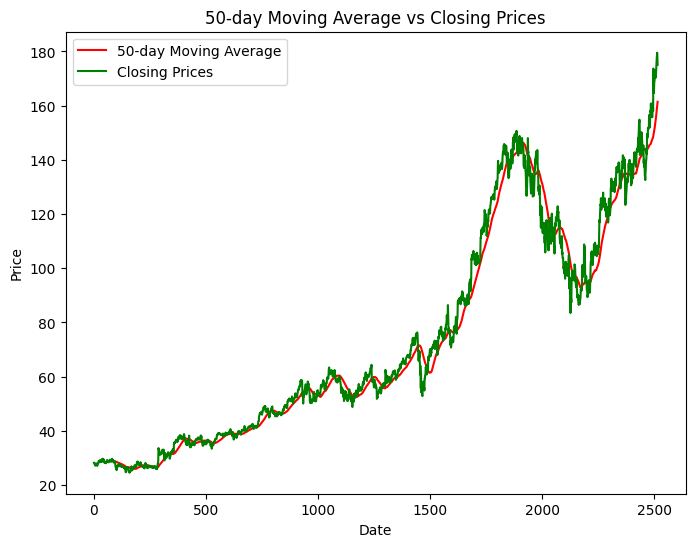

In [37]:
plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'r', label='50-day Moving Average')
plt.plot(data.Close, 'g', label='Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('50-day Moving Average vs Closing Prices')
plt.legend()
plt.show()

### 100-day Moving Average vs Closing Prices

In [38]:
ma_100_days = data.Close.rolling(100).mean()

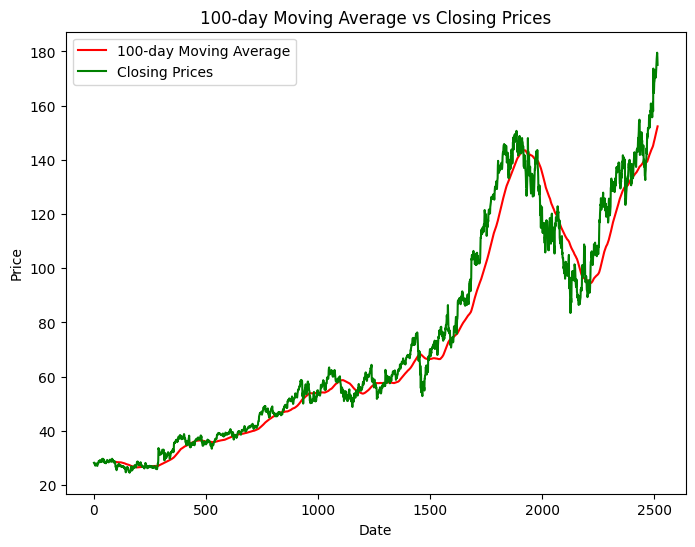

In [39]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='100-day Moving Average')
plt.plot(data.Close, 'g', label='Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('100-day Moving Average vs Closing Prices')
plt.legend()
plt.show()

### Comparison of Moving Averages (100-day and 200-day) with Closing Prices

In [40]:
ma_200_days = data.Close.rolling(200).mean()

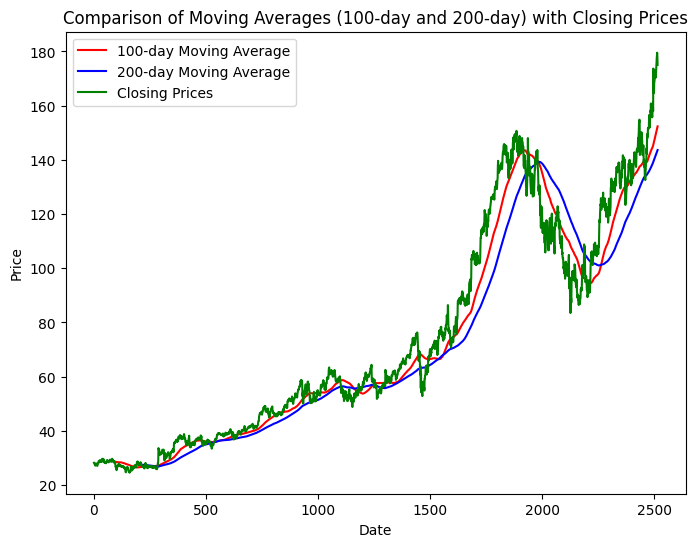

In [41]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='100-day Moving Average')
plt.plot(ma_200_days, 'b', label='200-day Moving Average')
plt.plot(data.Close, 'g', label='Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Moving Averages (100-day and 200-day) with Closing Prices')
plt.legend()
plt.show()

### Feature Selection

In [42]:
# Feature selection
feature_columns = ['Close', 'Volume']  # Using Close price and Volume as features
data = data[feature_columns]

### Splitting data into Train and Test Data

In [43]:
train_size = int(len(data) * 0.80)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

### Normalization

In [44]:
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


### Function to create input features and target variable

In [45]:
# Function to create input features and target variable
def create_dataset(dataset, time_step=1):
    x, y = [], []
    for i in range(len(dataset) - time_step):
        x.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(x), np.array(y)

time_step = 100  # Number of time steps to look back
x_train, y_train = create_dataset(train_data_scaled, time_step)
x_test, y_test = create_dataset(test_data_scaled, time_step)


In [46]:
print("Original shape of x_train:", x_train.shape)
print("Original shape of x_test:", x_test.shape)

Original shape of x_train: (1913, 100)
Original shape of x_test: (404, 100)


### Reshaping data for LSTM(Long Short-Term Memory )

In [47]:
# Reshaping data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Model Building

In [49]:
# Model building
model = Sequential()

# Adding LSTM layers with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120))
model.add(Dropout(0.5))

# Adding output layer
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')


### Training The Model

In [50]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - loss: 0.0366
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - loss: 0.0042
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - loss: 0.0042
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - loss: 0.0031
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - loss: 0.0039
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - loss: 0.0031
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - loss: 0.0028
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - loss: 0.0030
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - loss: 0.0026
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - loss: 0.0039
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - loss: 0.0024
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - loss: 0.0025
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - loss: 0.0031
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - loss: 0.0022
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 

### Model Evaluation

In [51]:
# Evaluate the model
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


### Transforming predictions and actual values back to original scale

In [52]:
# Transforming predictions and actual values back to original scale
train_predictions = scaler.inverse_transform(np.concatenate((train_predictions, np.zeros((len(train_predictions), len(feature_columns) - 1))), axis=1))[:, 0]
y_train = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((len(y_train), len(feature_columns) - 1))), axis=1))[:, 0]
test_predictions = scaler.inverse_transform(np.concatenate((test_predictions, np.zeros((len(test_predictions), len(feature_columns) - 1))), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), len(feature_columns) - 1))), axis=1))[:, 0]


### Calculate Root Mearn Square Error

In [53]:
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 3.0579825099518274
Test RMSE: 5.822755706672717


### Save the model in the native Keras format

In [54]:
# Save the model in the native Keras format
model.save('Stock_Prediction_Model.keras')